In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader,TensorDataset

## Load Dataset ##

In [2]:
train = datasets.MNIST(root = '/home/aminul/data',train = True, transform = transforms.ToTensor(), download = False)
test = datasets.MNIST(root = '/home/aminul/data',train = False, transform = transforms.ToTensor(), download = False)

In [3]:
train_loader = DataLoader(train,100,True)
test_loader = DataLoader(test,100,False)

## MLP Classifier ##

In [28]:
class MLP(nn.Module):
    def __init__(self,in_size,hidden_size,op_size):
        super(MLP,self).__init__()
        self.input_size = in_size
        self.hidden_size = hidden_size
        self.output_size = op_size
          
        self.fc1 = nn.Linear(self.input_size,self.hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_size,self.output_size)
        
    def forward(self,x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        
        return output

In [29]:
class MLP_tanh(nn.Module):
    def __init__(self,in_size,hidden_size,op_size):
        super(MLP_tanh,self).__init__()
        self.input_size = in_size
        self.hidden_size = hidden_size
        self.output_size = op_size
          
        self.fc1 = nn.Linear(self.input_size,self.hidden_size)
        self.tanh = nn.Hardtanh()
        self.fc2 = nn.Linear(self.hidden_size,self.output_size)
        
    def forward(self,x):
        output = self.fc1(x)
        output = self.tanh(output)
        output = self.fc2(output)
        
        return output

In [30]:
class MLP_TwoLayer(nn.Module):
    def __init__(self,in_size,hidden_size_1,hidden_size_2,op_size):
        super(MLP_TwoLayer,self).__init__()
        self.input_size = in_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = op_size
          
        self.fc1 = nn.Linear(self.input_size,self.hidden_size_1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_size_1,self.hidden_size_2)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(self.hidden_size_2,self.output_size)
        
    def forward(self,x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        output = self.relu(output)
        output = self.fc3(output)
        
        return output

In [6]:
def train(model,train_loader,num_epochs,opt):
    loss_list = []
    iteration_list = []
    accuracy_list = []

    for epoch in range(num_epochs):
        total_loss = 0
        total_correct = 0
        total_data = 0
        for i, (images, labels) in enumerate(train_loader):

            images = images.reshape(-1,28*28)
            labels = labels

            output = model(images)
            total_loss = criterion(output,labels)

            opt.zero_grad()
            total_loss.backward()
            opt.step()

            total_data += labels.size(0)
            total_loss += total_loss.item()
            _,p = torch.max(output.data,dim =1)
            total_correct += (p == labels).sum().item()

        print("Training: epoch: [{}/{}] Loss: [{:.2f}] Accuracy [{:.2f}]".format(epoch+1,num_epochs,
                                                                                 total_loss,total_correct*100/total_data)) 
        loss_list.append(total_loss)
        iteration_list.append(epoch)
        accuracy_list.append(total_correct*100/total_data)
        
    return iteration_list,loss_list,accuracy_list

In [7]:
def test(model,test_loader):
    model.eval()
    with torch.no_grad():
        print("======================================================")
        print("TESTING")
        print("======================================================")
        total_loss = 0
        total_correct = 0
        total_data = 0
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            output = model(images)
            total_loss = criterion(output,labels)

            total_data += labels.size(0)
            total_loss += total_loss.item()
            _,p = torch.max(output.data,dim =1)
            total_correct += (p == labels).sum().item()
        
        print("Testing: Loss: [{:.2f}] Accuracy [{:.2f}]".format(total_loss,total_correct*100/total_data)) 

In [8]:
def visualize(history):
    print("======================================================")
    plt.plot(history[0],history[1])
    plt.xlabel("Number of iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs Number of iteration")
    plt.show()

    # visualization accuracy 
    plt.plot(history[0],history[2],color = "red")
    plt.xlabel("Number of iteration")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Number of iteration")
    plt.show()

## Set the Parameters ##

In [9]:
input_size = 784
hidden_size_1 = 500
hidden_size_2 = 250
num_classes = 10
learning_rate = 0.01
num_epoch = 15

## One Layer MLP vs Two Layer MLP ##

In [10]:
criterion = nn.CrossEntropyLoss()

model1 = MLP(input_size, hidden_size_1,num_classes)

opt_1 = torch.optim.SGD(model1.parameters(),lr=learning_rate)

model2 = MLP_TwoLayer(input_size, hidden_size_1,hidden_size_2,num_classes)

opt_2 = torch.optim.SGD(model2.parameters(),lr=learning_rate)

Training: epoch: [1/15] Loss: [1.67] Accuracy [70.73]
Training: epoch: [2/15] Loss: [0.75] Accuracy [85.73]
Training: epoch: [3/15] Loss: [0.94] Accuracy [88.16]
Training: epoch: [4/15] Loss: [0.88] Accuracy [89.26]
Training: epoch: [5/15] Loss: [0.78] Accuracy [89.89]
Training: epoch: [6/15] Loss: [0.70] Accuracy [90.37]
Training: epoch: [7/15] Loss: [0.37] Accuracy [90.83]
Training: epoch: [8/15] Loss: [0.61] Accuracy [91.11]
Training: epoch: [9/15] Loss: [0.51] Accuracy [91.45]
Training: epoch: [10/15] Loss: [0.69] Accuracy [91.78]
Training: epoch: [11/15] Loss: [0.69] Accuracy [92.07]
Training: epoch: [12/15] Loss: [0.40] Accuracy [92.27]
Training: epoch: [13/15] Loss: [0.20] Accuracy [92.57]
Training: epoch: [14/15] Loss: [0.22] Accuracy [92.77]
Training: epoch: [15/15] Loss: [0.43] Accuracy [92.97]
TESTING
Testing: Loss: [0.75] Accuracy [93.21]


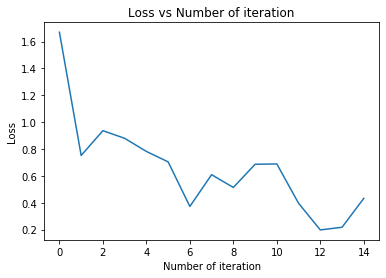

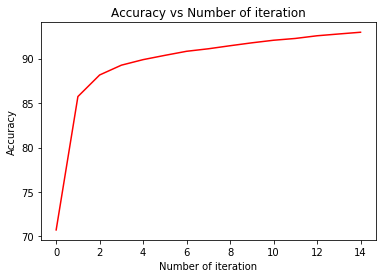

In [11]:
history = train(model1,train_loader,num_epoch,opt_1)
test(model1,test_loader)
visualize(history)

Training: epoch: [1/15] Loss: [2.58] Accuracy [56.31]
Training: epoch: [2/15] Loss: [1.19] Accuracy [81.34]
Training: epoch: [3/15] Loss: [0.77] Accuracy [87.23]
Training: epoch: [4/15] Loss: [0.68] Accuracy [89.00]
Training: epoch: [5/15] Loss: [0.62] Accuracy [89.96]
Training: epoch: [6/15] Loss: [0.71] Accuracy [90.65]
Training: epoch: [7/15] Loss: [0.64] Accuracy [91.06]
Training: epoch: [8/15] Loss: [0.70] Accuracy [91.52]
Training: epoch: [9/15] Loss: [0.63] Accuracy [91.96]
Training: epoch: [10/15] Loss: [0.46] Accuracy [92.29]
Training: epoch: [11/15] Loss: [0.59] Accuracy [92.66]
Training: epoch: [12/15] Loss: [0.60] Accuracy [92.95]
Training: epoch: [13/15] Loss: [0.29] Accuracy [93.23]
Training: epoch: [14/15] Loss: [0.47] Accuracy [93.50]
Training: epoch: [15/15] Loss: [0.34] Accuracy [93.75]
TESTING
Testing: Loss: [0.61] Accuracy [93.94]


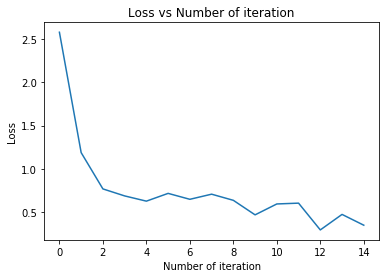

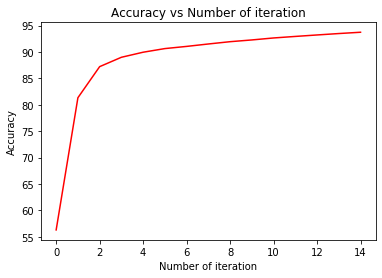

In [12]:
history = train(model2,train_loader,num_epoch,opt_2)
test(model2,test_loader)
visualize(history)

## ADAM vs SGD Optimizer ##

In [13]:
criterion = nn.CrossEntropyLoss()

model3 = MLP(input_size, hidden_size_1,num_classes)

opt_1 = torch.optim.Adam(model3.parameters(),lr=learning_rate)

model4 = MLP(input_size, hidden_size_1,num_classes)

opt_2 = torch.optim.SGD(model4.parameters(),lr=learning_rate)

Training: epoch: [1/15] Loss: [0.15] Accuracy [93.46]
Training: epoch: [2/15] Loss: [0.02] Accuracy [96.56]
Training: epoch: [3/15] Loss: [0.40] Accuracy [97.18]
Training: epoch: [4/15] Loss: [0.05] Accuracy [97.74]
Training: epoch: [5/15] Loss: [0.02] Accuracy [97.94]
Training: epoch: [6/15] Loss: [0.15] Accuracy [98.08]
Training: epoch: [7/15] Loss: [0.10] Accuracy [98.38]
Training: epoch: [8/15] Loss: [0.06] Accuracy [98.35]
Training: epoch: [9/15] Loss: [0.20] Accuracy [98.58]
Training: epoch: [10/15] Loss: [0.48] Accuracy [98.50]
Training: epoch: [11/15] Loss: [0.00] Accuracy [98.76]
Training: epoch: [12/15] Loss: [0.01] Accuracy [98.86]
Training: epoch: [13/15] Loss: [0.08] Accuracy [98.86]
Training: epoch: [14/15] Loss: [0.00] Accuracy [98.82]
Training: epoch: [15/15] Loss: [0.00] Accuracy [98.99]
TESTING
Testing: Loss: [0.22] Accuracy [97.47]


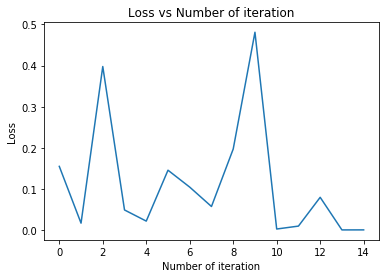

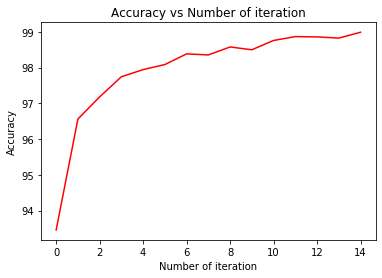

In [14]:
history = train(model3,train_loader,num_epoch,opt_1)
test(model3,test_loader)
visualize(history)

Training: epoch: [1/15] Loss: [1.68] Accuracy [72.00]
Training: epoch: [2/15] Loss: [0.83] Accuracy [85.98]
Training: epoch: [3/15] Loss: [1.03] Accuracy [88.17]
Training: epoch: [4/15] Loss: [0.72] Accuracy [89.20]
Training: epoch: [5/15] Loss: [0.51] Accuracy [89.89]
Training: epoch: [6/15] Loss: [0.46] Accuracy [90.34]
Training: epoch: [7/15] Loss: [0.75] Accuracy [90.76]
Training: epoch: [8/15] Loss: [0.73] Accuracy [91.08]
Training: epoch: [9/15] Loss: [0.50] Accuracy [91.43]
Training: epoch: [10/15] Loss: [0.65] Accuracy [91.72]
Training: epoch: [11/15] Loss: [0.55] Accuracy [91.98]
Training: epoch: [12/15] Loss: [0.45] Accuracy [92.22]
Training: epoch: [13/15] Loss: [0.44] Accuracy [92.48]
Training: epoch: [14/15] Loss: [0.55] Accuracy [92.65]
Training: epoch: [15/15] Loss: [0.45] Accuracy [92.87]
TESTING
Testing: Loss: [0.74] Accuracy [93.21]


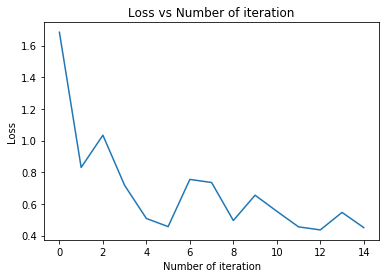

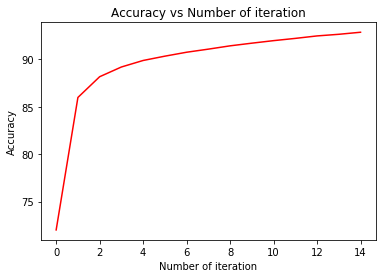

In [15]:
history = train(model4,train_loader,num_epoch,opt_2)
test(model4,test_loader)
visualize(history)

## ReLU vs Tanh activity Function ##

In [34]:
criterion = nn.CrossEntropyLoss()

model5 = MLP(input_size, hidden_size_1,num_classes)

opt_1 = torch.optim.Adam(model5.parameters(),lr=learning_rate)

model6 = MLP_tanh(input_size, hidden_size_1,num_classes)

opt_2 = torch.optim.Adam(model6.parameters(),lr=learning_rate)

Training: epoch: [1/15] Loss: [0.23] Accuracy [93.66]
Training: epoch: [2/15] Loss: [0.18] Accuracy [96.41]
Training: epoch: [3/15] Loss: [0.18] Accuracy [97.23]
Training: epoch: [4/15] Loss: [0.14] Accuracy [97.58]
Training: epoch: [5/15] Loss: [0.49] Accuracy [97.78]
Training: epoch: [6/15] Loss: [0.05] Accuracy [98.05]
Training: epoch: [7/15] Loss: [0.02] Accuracy [98.27]
Training: epoch: [8/15] Loss: [0.02] Accuracy [98.32]
Training: epoch: [9/15] Loss: [0.02] Accuracy [98.50]
Training: epoch: [10/15] Loss: [0.30] Accuracy [98.60]
Training: epoch: [11/15] Loss: [0.12] Accuracy [98.67]
Training: epoch: [12/15] Loss: [0.20] Accuracy [98.70]
Training: epoch: [13/15] Loss: [0.21] Accuracy [98.92]
Training: epoch: [14/15] Loss: [0.00] Accuracy [98.75]
Training: epoch: [15/15] Loss: [0.09] Accuracy [98.96]
TESTING
Testing: Loss: [0.14] Accuracy [97.34]


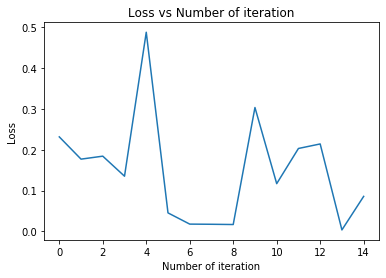

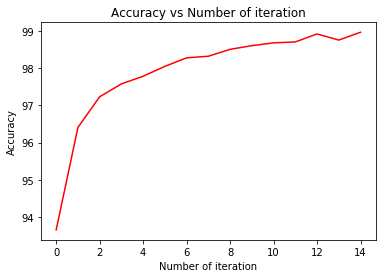

In [35]:
history = train(model5,train_loader,num_epoch,opt_1)
test(model5,test_loader)
visualize(history)

Training: epoch: [1/15] Loss: [1.24] Accuracy [91.61]
Training: epoch: [2/15] Loss: [0.48] Accuracy [93.89]
Training: epoch: [3/15] Loss: [0.24] Accuracy [94.52]
Training: epoch: [4/15] Loss: [0.24] Accuracy [95.03]
Training: epoch: [5/15] Loss: [0.19] Accuracy [95.12]
Training: epoch: [6/15] Loss: [0.57] Accuracy [95.25]
Training: epoch: [7/15] Loss: [0.10] Accuracy [95.43]
Training: epoch: [8/15] Loss: [0.57] Accuracy [95.47]
Training: epoch: [9/15] Loss: [0.17] Accuracy [96.03]
Training: epoch: [10/15] Loss: [0.32] Accuracy [96.01]
Training: epoch: [11/15] Loss: [0.51] Accuracy [95.83]
Training: epoch: [12/15] Loss: [0.40] Accuracy [96.22]
Training: epoch: [13/15] Loss: [0.18] Accuracy [96.46]
Training: epoch: [14/15] Loss: [0.10] Accuracy [96.31]
Training: epoch: [15/15] Loss: [0.39] Accuracy [96.35]
TESTING
Testing: Loss: [0.64] Accuracy [95.73]


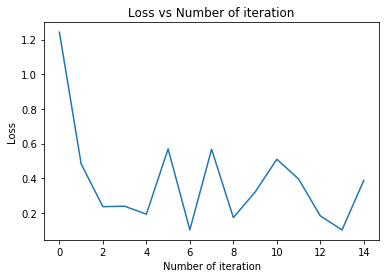

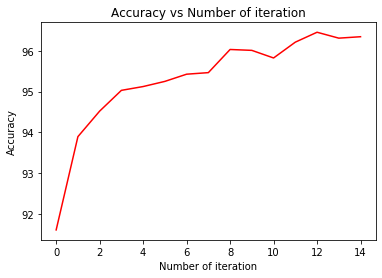

In [36]:
history = train(model6,train_loader,num_epoch,opt_2)
test(model6,test_loader)
visualize(history)